In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/110.0.5481.178"})
    soup=bts(result.text,"html.parser")
    return soup

In [3]:
pages=["https://wunderflats.com/en/furnished-apartments/berlin"]
for page in range(2,72):
    pages.append("https://wunderflats.com/en/furnished-apartments/berlin/" +str (page))
    
pages

['https://wunderflats.com/en/furnished-apartments/berlin',
 'https://wunderflats.com/en/furnished-apartments/berlin/2',
 'https://wunderflats.com/en/furnished-apartments/berlin/3',
 'https://wunderflats.com/en/furnished-apartments/berlin/4',
 'https://wunderflats.com/en/furnished-apartments/berlin/5',
 'https://wunderflats.com/en/furnished-apartments/berlin/6',
 'https://wunderflats.com/en/furnished-apartments/berlin/7',
 'https://wunderflats.com/en/furnished-apartments/berlin/8',
 'https://wunderflats.com/en/furnished-apartments/berlin/9',
 'https://wunderflats.com/en/furnished-apartments/berlin/10',
 'https://wunderflats.com/en/furnished-apartments/berlin/11',
 'https://wunderflats.com/en/furnished-apartments/berlin/12',
 'https://wunderflats.com/en/furnished-apartments/berlin/13',
 'https://wunderflats.com/en/furnished-apartments/berlin/14',
 'https://wunderflats.com/en/furnished-apartments/berlin/15',
 'https://wunderflats.com/en/furnished-apartments/berlin/16',
 'https://wunderfla

In [4]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"Listing-link"}):
        links.append("https://wunderflats.com" + resulthf.get("href"))

links

['https://wunderflats.com/en/furnished-apartment/fashionable-gorgeous-apartment-in-kreuzberg-berlin/58bd75e5f04cd311c5b163d3?dataLayerKey=mIw2tTqfk8-moRXrn3Fot',
 'https://wunderflats.com/en/furnished-apartment/bright-and-awesome-apartment-with-south-facing-balcony-in-schoeneberg/62cd4196369983cd31175a99?dataLayerKey=mIw2tTqfk8-moRXrn3Fot',
 'https://wunderflats.com/en/furnished-apartment/bright-and-quiet-apartment-in-awsome-schoeneberg/5df7a39f33cd790006bcfb2a?dataLayerKey=mIw2tTqfk8-moRXrn3Fot',
 'https://wunderflats.com/en/furnished-apartment/bright-apartment-with-balcony-in-trendy-neukoelln/5f43e28cf0b7860006a7fd32?dataLayerKey=mIw2tTqfk8-moRXrn3Fot',
 'https://wunderflats.com/en/furnished-apartment/wonderful-stylishly-furnished-apartment-in-prenzlauer-berg/5ce5654ea7bcad000792f33a?dataLayerKey=mIw2tTqfk8-moRXrn3Fot',
 'https://wunderflats.com/en/furnished-apartment/ebert-charming-1-room-apartment-in-friedrichshain/6317593d4b35bf965dc6172c?dataLayerKey=mIw2tTqfk8-moRXrn3Fot',
 'htt

In [5]:
len(links)

2105

In [6]:
ex=getAndParseURL("https://wunderflats.com/en/furnished-apartment/new-bright-calm-apartment-in-kreuzberg/63ece0d1dbc2649d264a1df8?dataLayerKey=mIw2tTqfk8-moRXrn3Fot")

In [8]:
### For Rent Price ###
ex.find("strong",{"class":"ListingPriceText-value"}).text.replace("€","").replace(",","").strip()

'2350'

In [12]:
### Net Area Of Flat###
ex.find("span",{"class":"ListingDetails-statsElt floor"}).text[0:3].strip()

'84'

In [15]:
### Location Info ###
ex.find("span",{"class":"txt-light"}).text.strip()

'Manteuffelstraße, 10999, Berlin'

In [27]:
### Capacity ###
ex.find("span",{"class":"ListingDetails-statsElt guests"}).text.strip()

'2 People'

In [21]:
### Bedroom Number ###
ex.find("span",{"class":"ListingDetails-statsElt rooms"}).text.replace("Rooms","").strip()

'3'

In [29]:
### Deposit ###
ex.findAll("div",{"class":"CostOverview-itemRow"})[1].text.replace("Security deposit€","").replace(",","").strip()

'3000'

In [30]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("span",{"class":"txt-light"}).text.strip()
    except:
        location = np.nan
    try:
        rent= html.find("strong",{"class":"ListingPriceText-value"}).text.replace("€","").replace(",","").strip()
    except:
        rent = np.nan
    try:
        deposit = html.findAll("div",{"class":"CostOverview-itemRow"})[1].text.replace("Security deposit€","").replace(",","").strip()
    except:
        deposit = np.nan
    try:
        rooms = html.find("span",{"class":"ListingDetails-statsElt rooms"}).text.replace("Rooms","").strip()
    except:
        rooms = np.nan
    try:
        capacity = html.find("span",{"class":"ListingDetails-statsElt guests"}).text.strip()
    except:
        capacity = np.nan
    try:
        net_area = html.find("span",{"class":"ListingDetails-statsElt floor"}).text[0:3].strip()
    except:
        net_area = np.nan
    time.sleep(2)
    
    result.append([location,rent,deposit,rooms,capacity,net_area])
    
columns=["Location","Rent","Deposit","Rooms","Capacity","Net Area"]
df = pd.DataFrame.from_records(result, columns=columns)

In [31]:
df

,Location,Rent,Deposit,Rooms,Capacity,Net Area
0,"Urbanstraße, 10967, Berlin",1200,1000,1 Room,1 Person,35
1,"Eisackstraße, 10827, Berlin",1590,2000,2,2 People,52
2,"Eisackstr., 10827, Berlin",1150,1500,2,1 Person,48
3,"Reuterstraße, 12047, Berlin",1650,1650,2,2 People,70
4,"Ostseestraße, 10409, Berlin",1790,2000,2,2 People,56
...,...,...,...,...,...,...
2100,"Storkower Straße, 10407, Berlin",2160,200,1 Room,1 Person,20
2101,"Flottwellstraße, 10785, Berlin",1400,1400,1 Room,1 Person,27
2102,"Stresemannstraße, 10963, Berlin",4200,3800,3,4 People,63
2103,"Oranienburger Straße, 10117, Berlin",3200,1000,1 Room,2 People,55


In [32]:
df.to_csv("berlin_second.csv")

In [18]:
df=pd.read_csv("berlin_second.csv")

In [22]:
df.head(8)

,Location,Rent,Deposit,Rooms,Capacity,Net Area
0,"Urbanstraße, 10967, Berlin",1200.0,1000.0,1 Room,1 Person,35.0
1,"Eisackstraße, 10827, Berlin",1590.0,2000.0,2,2 People,52.0
2,"Eisackstr., 10827, Berlin",1150.0,1500.0,2,1 Person,48.0
3,"Reuterstraße, 12047, Berlin",1650.0,1650.0,2,2 People,70.0
4,"Ostseestraße, 10409, Berlin",1790.0,2000.0,2,2 People,56.0
5,"Ebertystraße, 10249, Berlin",1590.0,3000.0,1 Room,2 People,40.0
6,"Richardstraße, 12043, Berlin",2290.0,3000.0,3,3 People,80.0
7,"Voltairestraße, 10179, Berlin",2590.0,5180.0,2,2 People,54.0


In [20]:
df.columns=df.columns.str.strip()

In [21]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  2103 non-null   object 
 1   Rent      2103 non-null   float64
 2   Deposit   2103 non-null   float64
 3   Rooms     2103 non-null   object 
 4   Capacity  2103 non-null   object 
 5   Net Area  2103 non-null   float64
dtypes: float64(3), object(3)
memory usage: 98.8+ KB


In [29]:
df["Rent"].unique()

array([ 1200.,  1590.,  1150.,  1650.,  1790.,  2290.,  2590.,  1750.,
        2450.,  2700.,  2300.,  2095.,  2350.,  3000.,  2850.,  1400.,
        1500.,  1690.,  2490.,  1450.,  1992.,  2900.,  2190.,  2650.,
        1950.,  2400.,  1600.,  1309.,  2200.,  1349.,  1806.,  3300.,
        1700.,  1890.,  2340.,  2695.,  1369.,  1100.,  2500.,  1639.,
        2950.,  1980.,  3350.,  1380.,  5000.,  2090.,  1199.,  2375.,
        1800.,  1075.,  2160.,  2250.,  2390.,  1880.,  1290.,  1300.,
        1365.,  2750.,  2360.,  1580.,  1339.,  1850.,  1760.,  1000.,
        3800.,  1350.,  3500.,  1990.,  2220.,  4000.,  1550.,  1210.,
        2849.,  2800.,  1815.,  1859.,  2540.,  3600.,  1640.,  2100.,
        3450.,  4450.,  1190.,    nan,  1480.,  1999.,  1684.,  1250.,
        1395.,  2150.,  1969.,  1390.,  1370.,  1050.,  3270.,  2990.,
        2000.,  1299.,  1490.,  1740.,  2778.,  2050.,  1340.,  3400.,
        1660.,  1430.,  2790.,  1670.,  3333.,  1895.,  4200.,  4300.,
      

In [5]:
df["Rent"].max()

21000.0

In [6]:
df["Rent"].min()

700.0

In [28]:
df["Rent"].mean()

2340.5087969567285

In [27]:
df['Rent'] = df['Rent'].apply(lambda x: '2340' if x == 'nan' else x)

In [40]:
df["Rooms"].unique()

array(['1', '2', '3', '5', '4', 1, '8', '6', '7', '9'], dtype=object)

In [39]:
df['Rooms'] = df['Rooms'].apply(lambda x: '1' if x == '1' else x)

In [37]:
df["Rooms"]=df["Rooms"].fillna(1)

In [41]:
df["Rooms"]=df["Rooms"].astype(int)

In [42]:
df["Deposit"].max()

30004.0

In [43]:
df["Deposit"].min()

0.0

In [44]:
df["Deposit"].mean()

2675.9938183547315

In [45]:
df["Net Area"].max()

330.0

In [46]:
df["Net Area"].min()

14.0

In [47]:
df["Net Area"].mean()

63.36043747028055

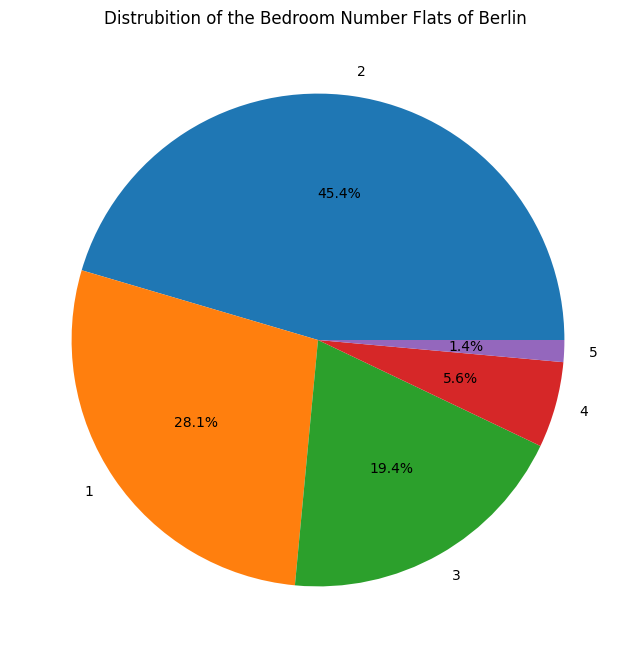

In [50]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Rooms'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Berlin ')

# display the chart
plt.show();


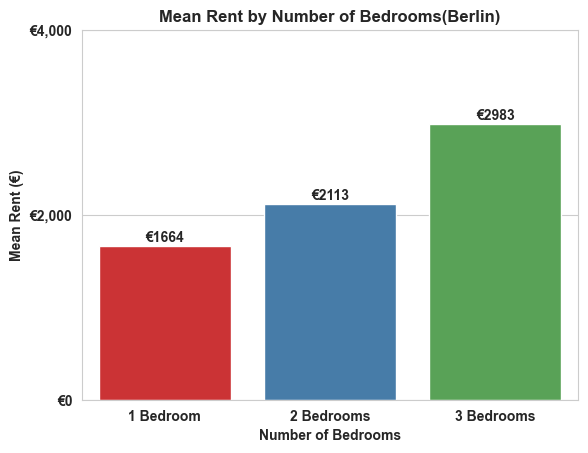

In [52]:
# Calculate mean rent for each group 
one_bed_mean_rent = df[df['Rooms'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Rooms'] == 2]['Rent'].mean()
three_bed_mean_rent = df[df['Rooms'] == 3]['Rent'].mean()

# Create a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 4000])
ax.set_yticklabels(['€0', '€2,000', '€4,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Berlin)', weight='bold')

plt.show();